Analisis exploratorio de Datos 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir('/home/erik/Documentos/cursos/Data-Science/Data')

In [3]:
os.getcwdb()

b'/home/erik/Documentos/cursos/Data-Science/Data'

In [4]:
mark = pd.read_csv("MarketingDirecto.csv",
                    sep=",")

In [5]:
mark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Edad       1000 non-null   object
 1   Genero     1000 non-null   object
 2   Vivienda   1000 non-null   object
 3   Ecivil     1000 non-null   object
 4   Ubicacion  1000 non-null   object
 5   Salario    1000 non-null   int64 
 6   Hijos      1000 non-null   int64 
 7   Historial  697 non-null    object
 8   Catalogos  1000 non-null   int64 
 9   Monto      1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [6]:
#Dimensiones de la calidad de datos
#Complitud de los datos
#no existen valores faltantes
mark.isnull().sum()/len(mark)*100

Edad          0.0
Genero        0.0
Vivienda      0.0
Ecivil        0.0
Ubicacion     0.0
Salario       0.0
Hijos         0.0
Historial    30.3
Catalogos     0.0
Monto         0.0
dtype: float64

In [7]:
#cualitativa: moda, modelo de clasificacion(inputacion supervisada), vecindad

#cuantitativas: media, modelo de regresion(inputacion supervisada), vecindad

In [8]:
import missingno as msno

In [9]:
mark["Historial"].mode()

0    Alto
Name: Historial, dtype: object

Variables cualitativas

In [10]:
mark["Historial"] = mark["Historial"].fillna(("Alto"))#inputa por la moda
#fillna() filtra los valores de NA

In [11]:
mark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Edad       1000 non-null   object
 1   Genero     1000 non-null   object
 2   Vivienda   1000 non-null   object
 3   Ecivil     1000 non-null   object
 4   Ubicacion  1000 non-null   object
 5   Salario    1000 non-null   int64 
 6   Hijos      1000 non-null   int64 
 7   Historial  1000 non-null   object
 8   Catalogos  1000 non-null   int64 
 9   Monto      1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [12]:
mark.isnull().sum()/len(mark)*100

Edad         0.0
Genero       0.0
Vivienda     0.0
Ecivil       0.0
Ubicacion    0.0
Salario      0.0
Hijos        0.0
Historial    0.0
Catalogos    0.0
Monto        0.0
dtype: float64

In [13]:
estado_civil = (mark.groupby("Ecivil").Ecivil.count()/len(mark))*100

In [14]:
len(estado_civil)

2

In [15]:
etiqueta = [str(estado_civil[x])+"%" for x in range(0,len(estado_civil))]

In [16]:
etiqueta[0]= "Casado"+etiqueta[0]
etiqueta[1] = "SOltero"+ etiqueta[1]

In [17]:
print(etiqueta)

['Casado50.2%', 'SOltero49.8%']


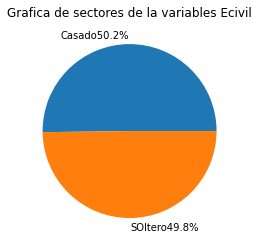

In [18]:
plt.pie(estado_civil,
        labels=etiqueta)
plt.title("Grafica de sectores de la variables Ecivil")
plt.show()

In [19]:
edad_mark = (mark.groupby("Edad").Edad.count()/len(mark))*100

In [20]:
edad_mark

Edad
Adulta    20.5
Joven     28.7
Media     50.8
Name: Edad, dtype: float64

In [21]:
edad_mark.info()

<class 'pandas.core.series.Series'>
Index: 3 entries, Adulta to Media
Series name: Edad
Non-Null Count  Dtype  
--------------  -----  
3 non-null      float64
dtypes: float64(1)
memory usage: 156.0+ bytes


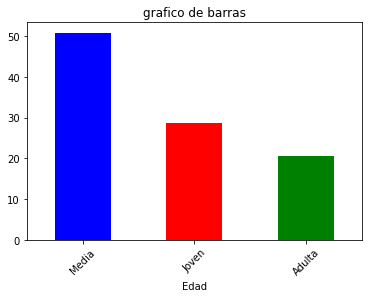

In [22]:
edad_mark.sort_values(ascending=False).plot(kind = "bar",
                                            title="grafico de barras",
                                            rot = 45,
                                            color = ["blue","red","green"])

plt.show()

Variables cuantitativas

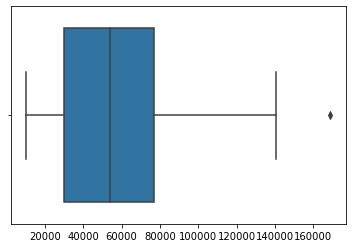

In [23]:
sns.boxplot(x = list(mark["Salario"]) )
plt.show()

<AxesSubplot:>

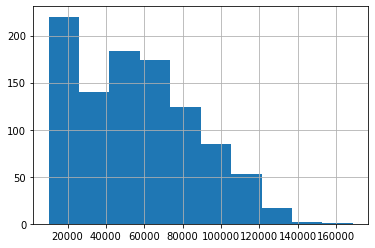

In [24]:
mark["Salario"].hist()

In [25]:
mark.Salario.quantile(0.5)

53700.0

In [26]:
mark["Salario"].quantile(0.5)-mark["Salario"].quantile(0.25)

23725.0

In [27]:
mark["Salario"].quantile(0.75)-mark["Salario"].quantile(0.5)

23325.0

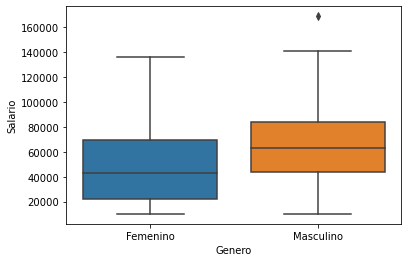

In [28]:
sns.boxplot(x="Genero",y="Salario",data=mark)
plt.show()

In [29]:
mark[mark.Genero == "Masculino"][["Salario"]].mean()#media de salario masculino

Salario    64202.42915
dtype: float64

In [30]:
mark[mark.Genero == "Femenino"][["Salario"]].mean()#media del salario femenino

Salario    48197.43083
dtype: float64

In [31]:
from statistics import median

In [32]:
median(mark[mark.Genero == "Masculino"]["Salario"])

62800.0

In [33]:
median(mark[mark.Genero == "Femenino"]["Salario"])

42650.0

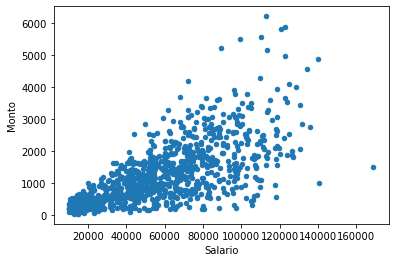

In [34]:
mark.plot.scatter(x = "Salario",y="Monto")
plt.show()
#la grafica de dispercion nos permite conocer la relacion de 2 variables

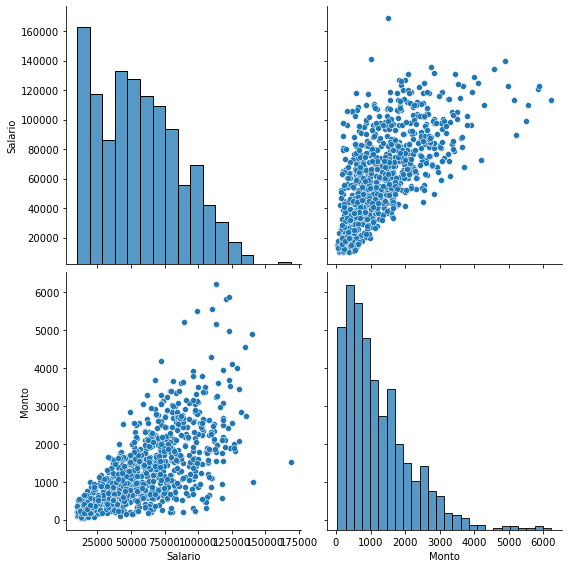

In [35]:
sns.pairplot(mark[["Salario","Monto"]], height=4)
plt.show()

In [36]:
mark.iloc[0:,9].values

array([ 755, 1318,  296, 2436, 1304,  495,  782, 1155,  158, 3034,  927,
       2065,  704, 2136, 5564, 2766, 3010, 1956,  542,  410,  194,  827,
       2328,  808,  521,  655,  707, 2075,  769,  774,  573, 2082, 2446,
       2636, 2226,  183, 1595,  584,  982,  576,  410, 3082, 2437, 3655,
        844, 2510,  983, 1215, 2000, 2574, 1116, 3604, 3360,  530,  906,
       2764, 1263, 1084, 1051,  614,  704,  449,  136,  468,  565, 1310,
       2595,  358, 1424, 4182,  468, 2924,  964,  615,   38, 1006,  307,
       1648,  220,  280, 1647,  704,  920,  258, 1821, 1587,  528,  867,
        643,  107, 1513, 4558,  741,  805,  470,  278, 1093,  470, 1856,
       1688,  708, 1753, 3044,  855,  550, 2265, 2452, 1184, 2150, 1575,
       1822, 1153, 1877,  450,  873,  209, 1472, 1702, 1857,  451,  344,
       1492, 2098, 3505,  127,  436, 2524,  189,  607,  202, 1554,  633,
        176, 3079, 2038, 1203,  326,  235, 3688,  332,  143, 3104, 2339,
        123,  879,  498, 3596, 2925, 1081,  312, 12

In [37]:
type(mark.iloc[0:,9].values)#tipo de dato arreglo de numpy

numpy.ndarray

In [38]:
mark[mark.Genero == "Masculino"][["Salario"]]#tipo de dato dataframe   

,Salario
1,63600
3,85600
5,30400
7,68400
9,80700
...,...
994,17600
996,40500
997,44800
998,79000


In [39]:
mark.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1304


In [40]:
mark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Edad       1000 non-null   object
 1   Genero     1000 non-null   object
 2   Vivienda   1000 non-null   object
 3   Ecivil     1000 non-null   object
 4   Ubicacion  1000 non-null   object
 5   Salario    1000 non-null   int64 
 6   Hijos      1000 non-null   int64 
 7   Historial  1000 non-null   object
 8   Catalogos  1000 non-null   int64 
 9   Monto      1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


Codificacion de datos tipo Object

In [41]:
from collections import defaultdict
from sklearn import preprocessing

In [42]:
d = defaultdict(preprocessing.LabelEncoder)

In [43]:
type(d)

collections.defaultdict

In [44]:
mark.columns.to_series()

Edad              Edad
Genero          Genero
Vivienda      Vivienda
Ecivil          Ecivil
Ubicacion    Ubicacion
Salario        Salario
Hijos            Hijos
Historial    Historial
Catalogos    Catalogos
Monto            Monto
dtype: object

In [45]:
grupos = mark.columns.to_series().groupby(mark.dtypes).groups

In [46]:
grupos

{int64: ['Salario', 'Hijos', 'Catalogos', 'Monto'], object: ['Edad', 'Genero', 'Vivienda', 'Ecivil', 'Ubicacion', 'Historial']}

In [47]:
object_list = list(grupos[np.dtype("object")])#combierte a lista

In [48]:
object_list#se selecciono solo las variables tipo object

['Edad', 'Genero', 'Vivienda', 'Ecivil', 'Ubicacion', 'Historial']

In [49]:
mark2 = mark.apply(lambda x: d[x.name].fit_transform(x) if x.name in object_list else x) 

- fit(): aprendizaje
- fit_transform(): aprendizaje mas transformacion
- tranform(): realiza la transformacion sobre los ya aprendido

In [50]:
mark2.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,0,0,1,1,1,47500,0,0,6,755
1,2,1,0,1,0,63600,0,0,6,1318
2,1,0,0,1,0,13500,0,1,18,296
3,2,1,1,0,0,85600,1,0,18,2436
4,2,0,1,1,0,68400,0,0,12,1304


In [51]:
genero = list(d["Genero"].classes_); print(genero)

['Femenino', 'Masculino']


In [52]:
cod_genero = list(d["Genero"].transform(genero)); print(cod_genero)

[0, 1]


In [53]:
dicc_de_variables = pd.DataFrame({"genero":genero,"cod_genero":cod_genero})
dicc_de_variables

,genero,cod_genero
0,Femenino,0
1,Masculino,1


- -->train (para aprender) datos que son utiles para desarrollar modelos de fit_transform()
- -->test (para probar o evaluar ) datos que son utiles para testear el modelo desarrollado transform()

Particionamiento de Datos

In [54]:
import os 

In [55]:
os.chdir('/home/erik/Documentos/cursos/Data-Science/Data')

In [56]:
os.getcwd()

'/home/erik/Documentos/cursos/Data-Science/Data'

In [57]:
bank = pd.read_csv("bank.csv",
                    sep=";")

In [58]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [59]:
bank[["y"]].values

array([['no'],
       ['no'],
       ['no'],
       ...,
       ['no'],
       ['no'],
       ['no']], dtype=object)

In [60]:
pd.value_counts(bank["y"])

no     4000
yes     521
Name: y, dtype: int64

In [61]:
pd.value_counts(bank["y"])/len(bank["y"])*100 #porcentaje

no     88.476001
yes    11.523999
Name: y, dtype: float64

<AxesSubplot:>

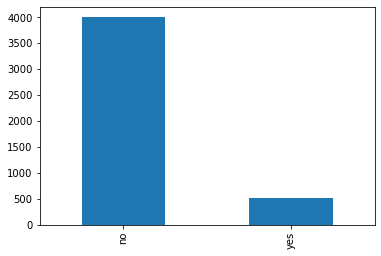

In [62]:
pd.value_counts(bank["y"]).plot(kind="bar")

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x = bank.iloc[:,0:16].values
y = bank.iloc[:,16].values

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 2021)

In [66]:
len(x_train)

3164

In [67]:
len(x_test)

1357

Imputacion de datos - Reemplazar los valores faltantes por los calculados

In [68]:
import os 

In [69]:
os.chdir('/home/erik/Documentos/cursos/Data-Science/Data')

In [75]:
marketing = pd.read_csv("MarketingDirecto_2.csv",
                    sep=";")

In [76]:
marketing.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,NaN


In [77]:
marketing.isnull().sum()/len(marketing)*100

Edad          0.0
Genero        0.0
Vivienda      0.0
Ecivil        0.0
Ubicacion     0.0
Salario       0.0
Hijos         0.0
Historial    30.3
Catalogos     0.0
Monto         1.3
dtype: float64

Niveles de perdidad de informacion

- 0.1% -1% valores faltantes es trivial
- 1% - 5% valores faltantes requieren de una tecnica para recuperar informacion
- 5% -20% se requiere metodos sofisticados (supervisados) para recuperar esta informacion

In [78]:
from sklearn.impute import SimpleImputer

#Parametros en la funcion SimpleImputer

strategy() = 
- promedio o media ="mean"
- mediana = "median"
- moda = "most_frequent"

In [79]:
imp_moda = SimpleImputer(missing_values=np.nan,
                        strategy="most_frequent")

In [80]:
imp_mediana = SimpleImputer(missing_values=np.nan,
                            strategy="median")

In [81]:
imp_media = SimpleImputer(missing_values=np.nan,
                        strategy="mean")

In [84]:
marketing[["Historial"]] = imp_moda.fit_transform(marketing[["Historial"]])
#la imputacion por la moda ejecutada no es la mas adecuada por que tiene el 30% de valores faltantes

In [85]:
marketing.isnull().sum()

Edad          0
Genero        0
Vivienda      0
Ecivil        0
Ubicacion     0
Salario       0
Hijos         0
Historial     0
Catalogos     0
Monto        13
dtype: int64

In [87]:
marketing[["Monto"]] = imp_moda.fit_transform(marketing[["Monto"]])

In [88]:
marketing.isnull().sum()

Edad         0
Genero       0
Vivienda     0
Ecivil       0
Ubicacion    0
Salario      0
Hijos        0
Historial    0
Catalogos    0
Monto        0
dtype: int64

- Imputacion de datos se refiere a la tarea de reemplazar valores faltantes  por valores calculados

- cuantitativa continua --> imputacion por la media
- cuantitativa discreta --> imputacion por la mediana
- cuantitativa --> imputacion por la mediana

- formas supervisadas (por que el proceso de imputacion se realiza en funcion de otra variable de imputacion)

- cuantitativa & los niveles de perdida es >5% --> imputacion por regresion
- cualitativa & los niveles de perdida es >5% --> imputacion por modelo de clasificaion (arboles de desicion)

In [89]:
os.chdir('/home/erik/Documentos/cursos/Data-Science/Data')

In [90]:
marketing = pd.read_csv("MarketingDirecto_2.csv",
                    sep=";")

In [91]:
marketing.isnull().sum()

Edad           0
Genero         0
Vivienda       0
Ecivil         0
Ubicacion      0
Salario        0
Hijos          0
Historial    303
Catalogos      0
Monto         13
dtype: int64

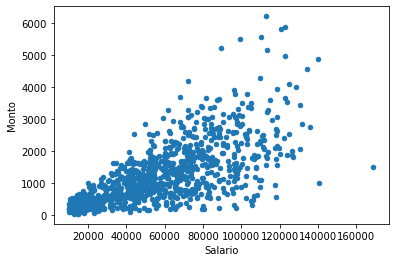

In [92]:
marketing.plot.scatter(x="Salario",y="Monto")
plt.show()

In [94]:
marketing[["Salario","Monto"]].head()

,Salario,Monto
0,47500,755.0
1,63600,1318.0
2,13500,296.0
3,85600,2436.0
4,68400,NaN
